In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import mannwhitneyu

Učitavanje potrebnih biblioteka, te učitavanje podataka u program.
Nakon učitavanja slijedi okviran pregled.

In [3]:
data = pd.read_csv('schools_data.csv')
data.shape

(7900, 32)

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,repeated,data_perimeter
0,MS,F,15,Urban,>3,Married,2,3,other,other,other,father,2,1,0,False,True,False,True,True,True,False,False,3,5,1,1,1,5,0,0,validation
1,MS,M,15,Urban,<=3,Married,4,3,teacher,services,home,mother,1,3,0,False,True,False,True,True,True,True,False,5,4,3,1,1,4,2,0,train
2,MS,M,16,Rural,>3,Divorced,4,4,other,teacher,reputation,mother,2,3,0,False,True,False,True,True,True,True,True,2,4,3,1,1,5,7,0,validation
3,MS,F,15,Rural,>3,Married,3,4,services,health,course,mother,1,3,0,True,True,True,True,True,True,True,False,4,3,2,1,1,5,2,0,train
4,MS,F,15,Rural,>3,Married,2,2,at_home,other,reputation,mother,1,1,0,True,True,True,True,True,True,False,False,4,3,1,1,1,2,8,0,validation


U ovom odjeljku ćemo opisati i grafički prikazati svaku varijablu posebno, te također odnos sa zavisnom. Provest će se i statistički testovi na razini značajnosti $\alpha = 0.05$ i također izračunat će se odds ration ili risk ratio za varijable za koje je to moguće i dati će se komentar za svaki dobiveni rezultat.

1. Varijabla za promatranje je zavisna varijabla **Repeated**. Ona govori je li učenik ponavljao godinu ili ne.

0    0.697215
1    0.302785
Name: repeated, dtype: float64

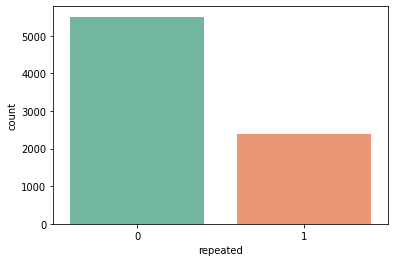

In [ ]:
sns.countplot(x = 'repeated', data = data)
data['repeated'].value_counts()/7900

Iz tablice frekvencija, tako i iz grafičkog prikaza da većina učenika nije ponavljala godinu u školi. $30\%$ od ukupnog broja učenika je ponavljalo školsku godinu.

Varijabla **SCHOOL** opisuje školu koju učenik pohađa. U podacima su su prisutne 4 škole. čiji pregled sljedi u nastavku.

GP    0.316709
RC    0.294304
LT    0.205696
MS    0.183291
Name: school, dtype: float64


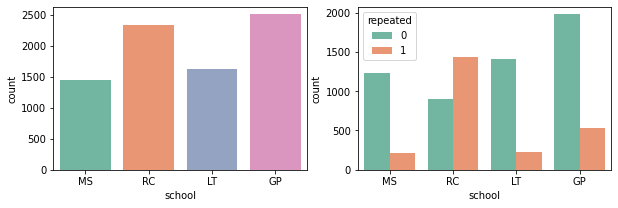

repeated     0     1
school              
GP        1975   527
LT        1403   222
MS        1234   214
RC         896  1429


In [ ]:
print(data['school'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0], x = 'school', data = data)
sns.countplot(ax = ax[1], x = 'school', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['school'],data['repeated'])
print(obs)

Možemo zaključiti kako najveći broj učenika pohađa GP školu, njih $31.6\%$. Također iz donjeg grafa se vidi da u školi RC je veći postatak učenika koji su pohađali godinu. Od 2325 godinu je ponavljalo njih $61.46\%$. To bi potencijalno moglo ukazivati na obrazovne probleme u samoj školi. Dalje, testirajmo ovisi li ponavljanje godine o školi koju učenik pohađa. Koristimo $\chi^2$ test.

In [ ]:
g, p, dof, expctd = chi2_contingency(obs,lambda_="log-likelihood")
print(p)

repeated     0     1
school              
GP        1975   527
LT        1403   222
MS        1234   214
RC         896  1429
0.0


$\chi^2$ test pokazuje ovisno varijable škola i ponavljanja godine. Možemo reći da ponavljanje godine ovisi o školi koju učenik pohađa. 

Varijabla **sex** pokazaju spol učenika.

F    0.526582
M    0.473418
Name: sex, dtype: float64


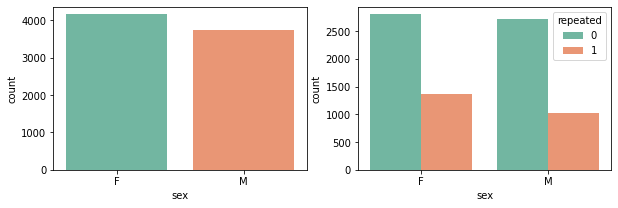

repeated     1     0
sex                 
F         1361  2799
M         1031  2709


In [ ]:
print(data['sex'].value_counts()/7900)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = axes[0],x = 'sex', data = data)
sns.countplot(ax = axes[1],x = 'sex', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['sex'],data['repeated'])
print(obs[[1,0]])

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print(p)

repeated     1     0
sex                 
F         1361  2799
M         1031  2709
7.207292390507581e-07


Iz rezultata $\chi^2$ testa možemo zaključiti da ponavljanje godine ovisi o spolu. 

In [ ]:
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  1.2776313696626445 p-Value: 7.212931680765025e-07


Ako izračunamo odds ili risk ratio, vidimo da ženski učenici imaju $1.27$ puta veći rizik od ponavljanja godine nego muški učenici.

Varijabla **AGE** prikazuje dob učenika. Opisnu statistiku, tj. osnovni podaci, se nalaze u tablici ispod.

In [ ]:
data.age.describe()

count    7900.000000
mean       16.696203
std         1.274507
min        15.000000
25%        16.000000
50%        17.000000
75%        18.000000
max        22.000000
Name: age, dtype: float64

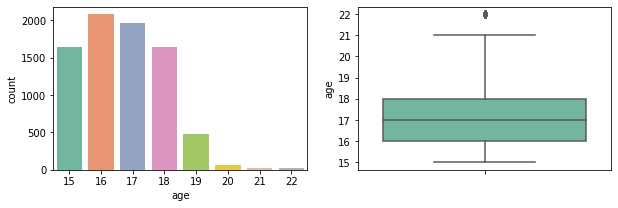

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0], x='age',data=data)
sns.boxplot(ax = ax[1], y='age',data=data)
plt.show()

Vidimo kako najveći broj učenika je u dobi od 16 godina. Također da se uočiti kako postoje učenici od 20 i više godina, čak 22., što je možemo reći malo stariji za srednju školu. Pogledajmo dalje usporedni graf dobi s zavisnom varijablom. Zatim ćemo testirati postoji li razlika u distribuciji varijable dobi od učenika koji su ponavljali i koji nisu.

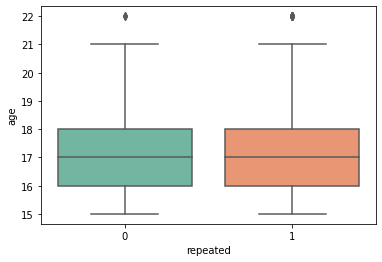

In [ ]:
sns.boxplot(y='age',x = 'repeated',data=data)
plt.show()

In [ ]:
r0 = data.age[data.repeated == 0]
r1 = data.age[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)
print(p)

1.0255377075099464e-22


Iz kutijastog dijagrama ne možemo na prvu vidjeti razliku, jer prisjetimo se nije jednak broj podataka u pojedinoj klasi. Stoga rezultat t-testa ukazuje na statistički značajnu razliku u distibuciju dobi.

Varijabla **ADDRESS** je kategorička varijabla koja kategorizira učenika živi li u urbanoj sredini ili u ruralnoj, npr. selo. 

Urban    0.777215
Rural    0.222785
Name: address, dtype: float64


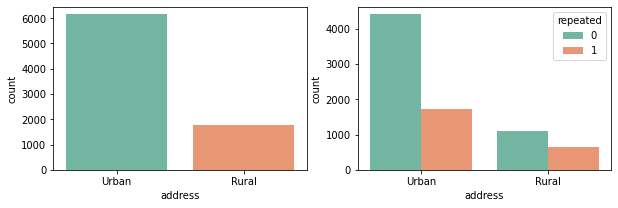

repeated     1     0
address             
Rural      655  1105
Urban     1737  4403


In [ ]:
print(data['address'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0], x = 'address', data = data)
sns.countplot(ax = ax[1],x = 'address', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['address'],data['repeated'])
print(obs[[1,0]])

Vidimo kako skoro $78\%$ učenika živi u urbanoj sredini. Nadalje, testirajmo zavisnost mjesta života i ponavljanja godine.

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

repeated     1     0
address             
Rural      655  1105
Urban     1737  4403
chi2 test p-value:  1.6413675145703275e-12
OddsR:  1.5025463885567512 p-Value: 1.491683833664934e-12


Rezultat testiranja ukazuje da postoji ovisnost mjesta gdje učenik živi i ponavljanja godine. Također možemo vidjeti da učenici koji žive u ruralnom okruženju imaju $1.5$ puta veći rizik od ponavljanja godine u odnosu na učenike iz urbanih. Razlozi tome mogu biti razni, putovanje, daleko mjesto prebivališta i slično.

5.varijabla = famsize

>3     0.711392
<=3    0.288608
Name: famsize, dtype: float64


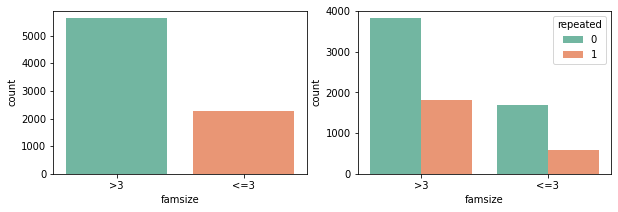

repeated     1     0
famsize             
<=3        589  1691
>3        1803  3817


In [ ]:
print(data['famsize'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0], x = 'famsize', data = data)
sns.countplot(ax = ax[1],x = 'famsize', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['famsize'],data['repeated'])
print(obs[[1,0]])

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

repeated     1     0
famsize             
<=3        589  1691
>3        1803  3817
chi2 test p-value:  3.7887932365568124e-08
OddsR:  0.7373914885926701 p-Value: 3.47321369191552e-08


Vidimo kako $71\%$ učenika živi u mnogobrojnijoj obitelji. Testiranjem zavisnosti utvrđeno je postojanje iste na ponavljanje godine. Isto tako vidimo da učenici koji žive s obiljeni do max. 3 člana imaju oko $0.74$ puta manji rizik od ponavljanja godine u odnosu na učenike u mnogobrojnijoj obitelji.

Varijabla **Pstatus** opisuje, tj kategorizira bračni status učenikova roditelj, tj jesu li vjenčani ili razvedeni.

Married     0.896203
Divorced    0.103797
Name: Pstatus, dtype: float64


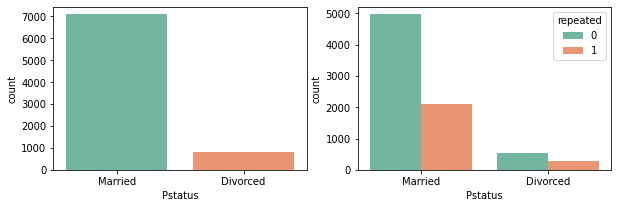

repeated     1     0
Pstatus             
Divorced   278   542
Married   2114  4966


In [ ]:
print(data['Pstatus'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'Pstatus', data = data)
sns.countplot(ax = ax[1],x = 'Pstatus', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['Pstatus'],data['repeated'])
print(obs[[1,0]])

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

repeated     1     0
Pstatus             
Divorced   278   542
Married   2114  4966
chi2 test p-value:  0.02011004261727061
OddsR:  1.2048895607215295 p-Value: 0.017869565928866786


Uočljivo je kako velika večina učenika živi u obitelji gdje su roditelji u braku, njih $89\%$. Postoji zavisnost među bračnim statusom roditelja i ponavljanja godine, te je izračunato da učenici kojima su roditelji razvedeni imaju $1.2$ veći rizik od ponavljanja godine.

Varijable **Medu** i **Fedu** su varijable koje opisuju stupanj obrazovanja majke tj. oca redom i to na način kako je opisano na slici
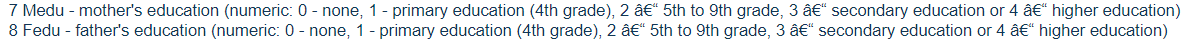

4    0.331646
2    0.260759
3    0.250633
1    0.149367
0    0.007595
Name: Medu, dtype: float64


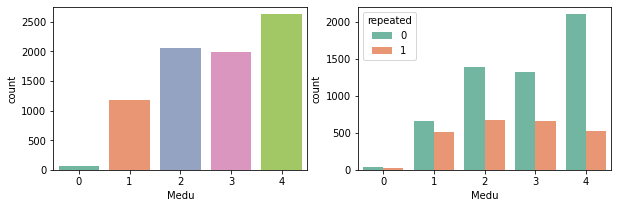

repeated    1     0
Medu               
0          19    41
1         515   665
2         676  1384
3         660  1320
4         522  2098


In [ ]:
print(data['Medu'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0], x = 'Medu', data = data)
sns.countplot(ax = ax[1], x = 'Medu', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['Medu'],data['repeated'])
print(obs[[1,0]])

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  1.9154892352225763e-53


2    0.291139
3    0.253165
4    0.243038
1    0.207595
0    0.005063
Name: Fedu, dtype: float64


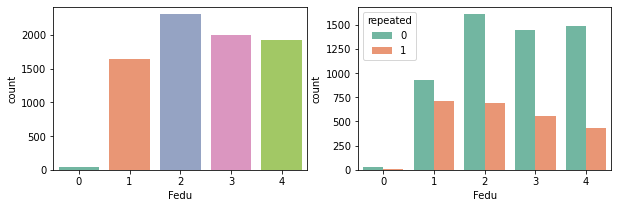

repeated    1     0
Fedu               
0           6    34
1         709   931
2         694  1606
3         553  1447
4         430  1490


In [ ]:
print(data['Fedu'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0], x = 'Fedu', data = data)
sns.countplot(ax = ax[1], x = 'Fedu', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['Fedu'],data['repeated'])
print(obs[[1,0]])


In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  7.80967622721655e-41


Iz grafičkih prikaza vidimo kako najviše majki ima visok stupan obrazovanja, dok je najveći broj očeva srednjoškolski obrazovano. Obje varijabli su pokazale statističku značajnost, tj. zavisnost, s zavisnom varijablom, što je na neki način i logično jer djeca visoko obrazovanih roditelja mogu od njih učiti i dobiti pomoć.

Varijable **Mjob** i **Fjob** varijable koje opisuju zaposlenje majke odnosno oca i to na način kao na slici

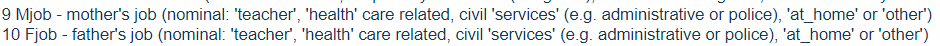

other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: Mjob, dtype: float64


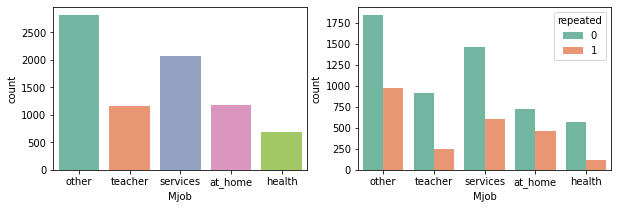

repeated    1     0
Mjob               
at_home   458   722
health    116   564
other     972  1848
services  602  1458
teacher   244   916


In [ ]:
print(data['Mjob'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'Mjob', data = data)
sns.countplot(ax = ax[1],x = 'Mjob', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['Mjob'],data['repeated'])
print(obs[[1,0]])

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  5.534005768615867e-37


other       0.549367
services    0.281013
teacher     0.073418
at_home     0.050633
health      0.045570
Name: Fjob, dtype: float64


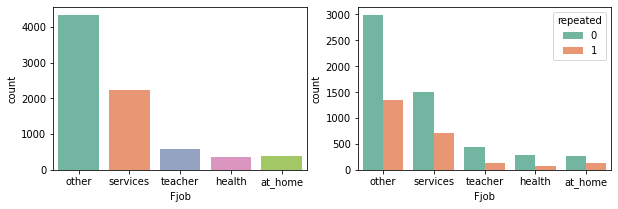

repeated     1     0
Fjob                
at_home    125   275
health      79   281
other     1344  2996
services   715  1505
teacher    129   451


In [ ]:
print(data['Fjob'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'Fjob', data = data)
sns.countplot(ax = ax[1],x = 'Fjob', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['Fjob'],data['repeated'])
print(obs[[1,0]])

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  2.360506464975341e-07


Možemo vidjeti da najveći postotak roditelja radi u ostalim službama. Najmanji postotak majci i očeva radi u zdravstvenom sektoru, njih $8.6\%$ odnosno $4.5\%$. Također se pokazuje zavisnost s ponavljanjem godine. 

Varijabla **reason** je kategorička varijabla i opisuje razlog upisa u određenu školu.

course        0.367089
home          0.275949
reputation    0.265823
other         0.091139
Name: reason, dtype: float64


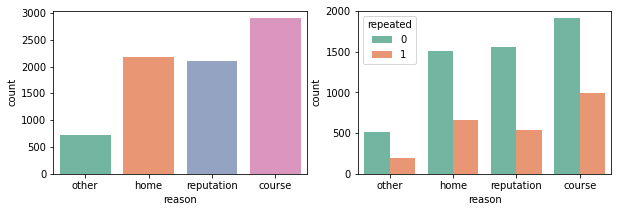

repeated      1     0
reason               
course      990  1910
home        667  1513
other       200   520
reputation  535  1565


In [ ]:
print(data['reason'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'reason', data = data)
sns.countplot(ax = ax[1],x = 'reason', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['reason'],data['repeated'])
print(obs[[1,0]])

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  5.704380116706152e-10


Analiza pokazuje da je $36.7\%$ učenika upisalo određenu školu zbog predmeta koje se u njoj izvode. Pokazana je statistička zavisnost s varijablom repeated.

Varijaba **guardian** je kategorička varijabla koja opisuje učenikovog skrbnika.

mother    0.691139
father    0.227848
other     0.081013
Name: guardian, dtype: float64


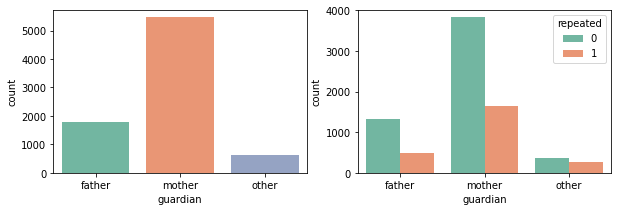

repeated     1     0
guardian            
father     486  1314
mother    1634  3826
other      272   368


In [ ]:
print(data['guardian'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'guardian', data = data)
sns.countplot(ax = ax[1],x = 'guardian', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['guardian'],data['repeated'])
print(obs[[1,0]])

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  4.410004950005862e-12


In [ ]:
272/(272+368)

0.425

Iz podataka je vidljivo, ono što je nekako ljudski i najlogičnije, da najveći postotal učenika, njih $69.11\%$. Također vidimo da je najveće proporcija učenika koji su ponavljali godinu kod učenika koji za skrbinka nemaju roditelje i njih je $42.5\%$. 

Varijabla **travel time** prikazuje vrijeme putovanja učenika od svoga doma do škole i to na sljedeći način:

image.png

1    0.650633
2    0.270886
3    0.058228
4    0.020253
Name: traveltime, dtype: float64


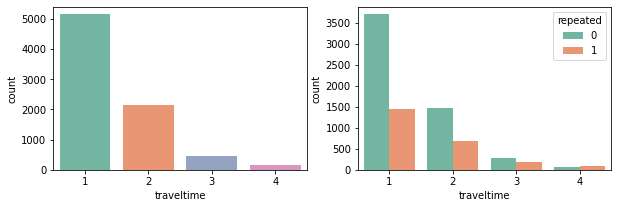

repeated       1     0
traveltime            
1           1448  3692
2            676  1464
3            186   274
4             82    78


In [ ]:
print(data['traveltime'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'traveltime', data = data)
sns.countplot(ax = ax[1],x = 'traveltime', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['traveltime'],data['repeated'])
print(obs[[1,0]])

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  6.397196838396823e-14


In [ ]:
82/(82+78)

0.5125

$65\%$ učenika ima manje od 15 minuta putovanja do svoje škole, dok svega $2\%$ njih putuje više od sata. U grupi učenika koji putuju više od sat vremena njih $51.25\%$ je ponavljalo godinu. Postoji zavisnost između vremena putovanja i ponavljanja godine, što je nekako i logično. 

Varijabla **study time** pokazuje koliko vremena na tjedan učenik provede učeći. 
image.png

2    0.501266
1    0.265823
3    0.164557
4    0.068354
Name: studytime, dtype: float64


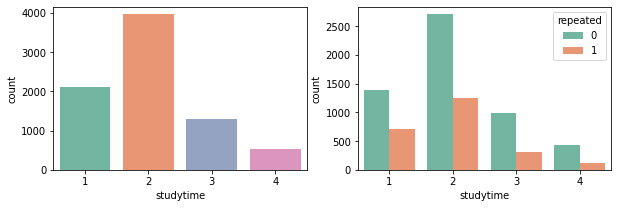

repeated      1     0
studytime            
1           713  1387
2          1257  2703
3           310   990
4           112   428


In [ ]:
print(data['studytime'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'studytime', data = data)
sns.countplot(ax = ax[1],x = 'studytime', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['studytime'],data['repeated'])
print(obs[[1,0]])

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  7.728917438749785e-15


In [ ]:
data['studytime'].value_counts()

2    3960
1    2100
3    1300
4     540
Name: studytime, dtype: int64

In [ ]:
print(713/2100)
print(1257/3960)
print(310/1300)
print(112/540)

0.3395238095238095
0.31742424242424244
0.23846153846153847
0.2074074074074074


Najveći broj učenika, njih polovica, tijekom tjedna potroši 2 do 5 sati na učenje. Najmanju promorciju učenika koji su ponavljai godinu od $20\%$ ima grupa učenika koja tjedno uči više od 10 sati. 

Varijabla **failures** je numeričkog tipa i pokazuje koliko je učenik imao predmeta koje je pao.

0    0.789873
1    0.126582
2    0.043038
3    0.040506
Name: failures, dtype: float64


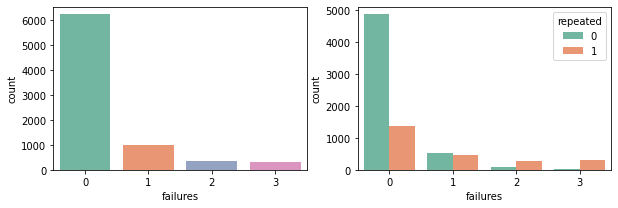

MVW:  9.457783184426722e-238


In [10]:
print(data['failures'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'failures', data = data)
sns.countplot(ax = ax[1],x = 'failures', hue = 'repeated',data = data)
plt.show()

r0 = data.failures[data.repeated == 0]
r1 = data.failures[data.repeated == 1]

stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)

In [8]:
obs = pd.crosstab(data['failures'],data['repeated'])
print(obs[[1,0]])

repeated     1     0
failures            
0         1372  4868
1          463   537
2          261    79
3          296    24


In [13]:
print(261/(261+79))
print(296/(296+24))

0.7676470588235295
0.925


Jako mali broj učenika, oko $8\%$ njih je palo 2 i 3 predmeta. MVW test je pokazao kako postoji razlika u distribuciji broja padova u odnosu na ponavljanje godine. Proporcija učenika koji su ponavljali godinu, a pali su 2 ili 3 predmeta iznosi redom $76.7\%$ i $92.5\%$. Učenici koji su pali 3 predmeta, gotovi svi su ponavljali godinu. 

Varijabla **schoolsup** opisuje dodatnu obrazovnu podršku. Varijabla tipa bool, tj imali učenik dodatno obrazovnu podršku ili ne. 

False    0.870886
True     0.129114
Name: schoolsup, dtype: float64


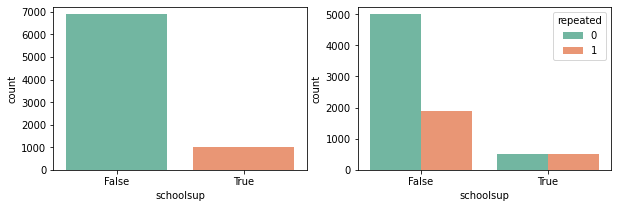

repeated      1     0
schoolsup            
False      1890  4990
True        502   518


In [ ]:
print(data['schoolsup'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'schoolsup', data = data)
sns.countplot(ax = ax[1],x = 'schoolsup', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['schoolsup'],data['repeated'])
print(obs[[1,0]])

In [ ]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  4.7592532931427565e-42


In [ ]:
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  0.39082946770034094 p-Value: 4.096583053399777e-42


In [ ]:
1/0.39082946770034094

2.5586607015178444

Velika većina učenika, $87\%$ nema nikakvu dodatnu obrazovnu podršku (instrukcije i sl.). $49\%$ učenika koji trebaju nekakvu dodatnu podršku je ponavljalo godinu. Traženje dodatne obrazovne podrške povećava rizik od ponavljanja godine za $2.55$ puta. 

Varijabla **famsup** pokazuje ima li učenik podršku obitelji za obrazovanje ili ne.

True     0.612658
False    0.387342
Name: famsup, dtype: float64


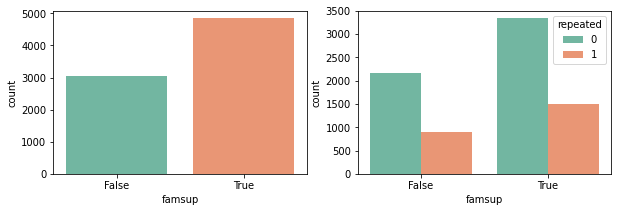

repeated     1     0
famsup              
False      889  2171
True      1503  3337


In [14]:
print(data['famsup'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'famsup', data = data)
sns.countplot(ax = ax[1],x = 'famsup', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['famsup'],data['repeated'])
print(obs[[1,0]])

In [16]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]])
print("chi2 test p-value: ",p)

chi2 test p-value:  0.06275171081042748


In [17]:
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  0.9091575792067025 p-Value: 0.05948715290047382


Vrijednost $\chi^2$ testa, te rezultati odds ratio ne ukazuju na statitiskučku značajnost obiteljske podrške i ponavljanja godine.

Varijabla **paid** pokazuje plaća li učenik dodatne sate iz određenih predmeta.

False    0.541772
True     0.458228
Name: paid, dtype: float64


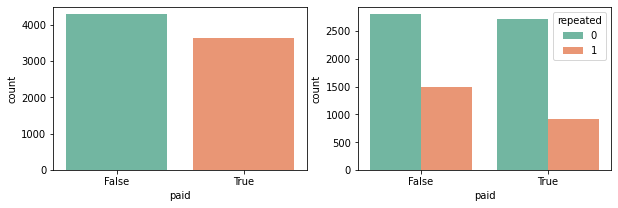

repeated     1     0
paid                
False     1483  2797
True       909  2711


In [18]:
print(data['paid'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'paid', data = data)
sns.countplot(ax = ax[1],x = 'paid', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['paid'],data['repeated'])
print(obs[[1,0]])

In [19]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  3.341874896834814e-20


In [20]:
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  1.5813001750657725 p-Value: 2.7832144367976905e-20


Vidljivo je kako $54\%$ ne plaća, a samim time ne sudjelju na nekim dodatnim satima. To pokazuje zavisnost s ponavljanjem godine, te učenici koji ne plaćaju dodatne sate imaju $1.58$ puta veći rizik od ponavljanja godine.

Varijabla **activities** ukazuje bavi li se učenik ekstra nastavnim aktivnostima.

True     0.508861
False    0.491139
Name: activities, dtype: float64


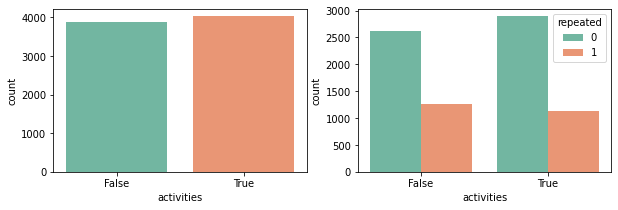

repeated       1     0
activities            
False       1262  2618
True        1130  2890


In [21]:
print(data['activities'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'activities', data = data)
sns.countplot(ax = ax[1],x = 'activities', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['activities'],data['repeated'])
print(obs[[1,0]])

In [22]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  2.1680338457294295e-05


In [23]:
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  1.2328467992184806 p-Value: 2.0240483162911497e-05


Skoro je podjednak broj učenika koji se bavi i onih koji ne. No testiranjem je ukazana zavisnost s povaljanjem godine, te učenici koji se na bave nekim dodatnim aktivnostima imaju $1.23$ puta veći rizik od ponavljanja godine. Zaključak je nekako i logičan jer učenici koji se bave na neki načim imaju bolju sliku kod učitelja.

Varijabla **nursery** opisuje pohađa li učenik jaslice, eng. nursery school. 

True     0.794937
False    0.205063
Name: nursery, dtype: float64


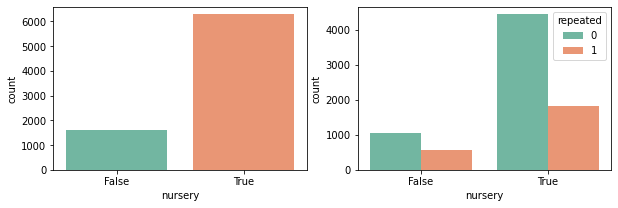

repeated     1     0
nursery             
False      554  1066
True      1838  4442


In [24]:
print(data['nursery'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'nursery', data = data)
sns.countplot(ax = ax[1],x = 'nursery', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['nursery'],data['repeated'])
print(obs[[1,0]])

In [25]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  0.0001513966622120322


In [27]:
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  1.2559883387400042 p-Value: 0.00013250899187726252


$80\%$ učenika pohađa jaslice, te im to pokazano ovisi o ponavljanu godine. Oni koji ne pohađaju jaslice imaju $1.25$ puta veću šansu za pohađanje godine.

Varijabla **higher** opisuje imali li učenik namjeru pohađati fakultet ili ne.

True     0.949367
False    0.050633
Name: higher, dtype: float64


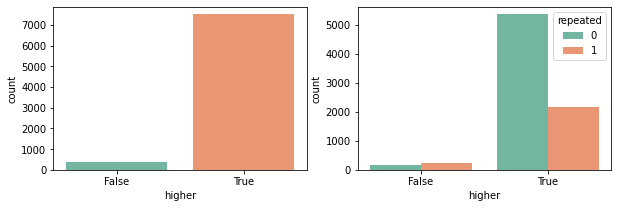

repeated     1     0
higher              
False      240   160
True      2152  5348


In [28]:
print(data['higher'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'higher', data = data)
sns.countplot(ax = ax[1],x = 'higher', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['higher'],data['repeated'])
print(obs[[1,0]])

In [29]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  2.828038062777878e-36


In [30]:
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  3.7276951672862455 p-Value: 2.4518695989107403e-36


Vidimo kako $95\%$ učenika, što je veliki broj, ima namjeru pohađati fakultet. Isto tako učenici koji nemaju namjeru ići na fakultet imaju skoro $4$ puta veći rizik od ponavljanja godine.

Varijabla **internet** pokazuje imali učenik pristup internetu ili ne. 

True     0.832911
False    0.167089
Name: internet, dtype: float64


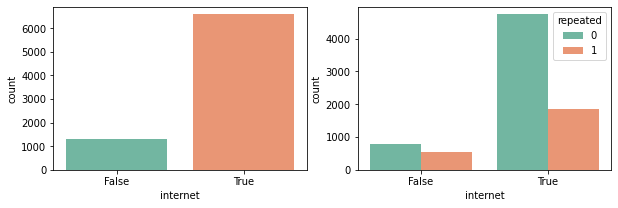

repeated     1     0
internet            
False      547   773
True      1845  4735


In [31]:
print(data['internet'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'internet', data = data)
sns.countplot(ax = ax[1],x = 'internet', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['internet'],data['repeated'])
print(obs[[1,0]])

In [32]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  4.248255417311261e-21


In [33]:
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  1.8160652369783723 p-Value: 3.9542706762047546e-21


Analizom je prikazano da $83\%$ učenika ima pristup internetu, dok skoro njih $17\%$ nema, što je za današnje vrijeme visok postotak. Samim time logično je pretpostaviti i testiranjem dokazati da postoji zavisnosti s ponavljanjem godine. Učenici koji nemaju pristup internetu imaju $1.816$ puta veći rizik od ponavljanja godine.

Varijalble **romantic** je li učenik u romatičnoj vezi

False    0.665823
True     0.334177
Name: romantic, dtype: float64


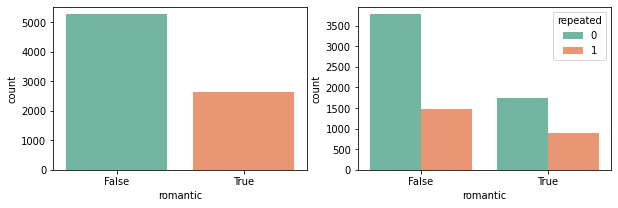

repeated     1     0
romantic            
False     1487  3773
True       905  1735


In [34]:
print(data['romantic'].value_counts()/7900)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x = 'romantic', data = data)
sns.countplot(ax = ax[1],x = 'romantic', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['romantic'],data['repeated'])
print(obs[[1,0]])

In [35]:
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

chi2 test p-value:  5.671201350897738e-08


In [36]:
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  0.7555706217336615 p-Value: 4.947518340552613e-08


Skoro $67\%$ učenika je u romatičnoj vezi. Vidimo kako učenici koji nisu imaju $0.756$ puta manju šansu od ponavljanja godine. 

Varijabla **famrel** numerička je varijabla i pokazuje kvaliteta obiteljskih odnosa ocjenama 1-5.

count    7900.000000
mean        3.944304
std         0.895580
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: famrel, dtype: float64


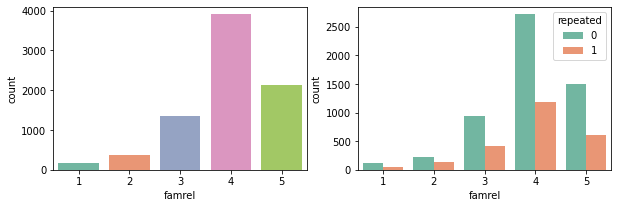

0.0619572539933194


In [39]:
print(data.famrel.describe())

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x='famrel',data=data)
sns.countplot(ax = ax[1],x='famrel',hue = 'repeated',data=data)
plt.show()


In [40]:
r0 = data.famrel[data.repeated == 0]
r1 = data.famrel[data.repeated == 1]
stat, p = mannwhitneyu(r0,r1)
print(p)

0.03723555941689749


Vidimo kako je medijalna ocjena 4. Gornji kvartil je 5, što znači da $25\%$ obitelji ima najbolje odnose. Testtiranjem smo ukazali na razliku u distribuciji ocjene obiteljskih odnosa obzirom na ponavljanje godine. 

Varijabla **freetime** numerička varijabla i pokazuje ocjenu slobodnog vremena nakon škole. 

count    7900.000000
mean        3.235443
std         0.997660
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: freetime, dtype: float64


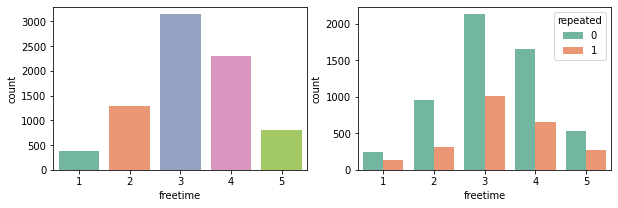

In [42]:
print(data.freetime.describe())

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x='freetime',data=data)
sns.countplot(ax = ax[1],x='freetime',hue = 'repeated',data=data)
plt.show()

In [41]:
r0 = data.freetime[data.repeated == 0]
r1 = data.freetime[data.repeated == 1]
stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)

MVW:  0.20546894878059846


Vidimo kako je srednja ocjena slobodnog vremena 3. Testom također nije ukazana razlika u distribuciji obzirom na ponavljanje godine. 

Varijaba **goout** numerička varijabla koja prikazuje ocjenu izlazaka s prijateljima, 1-malo, 5-mnogo. 

count    7900.000000
mean        3.108861
std         1.111938
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: goout, dtype: float64


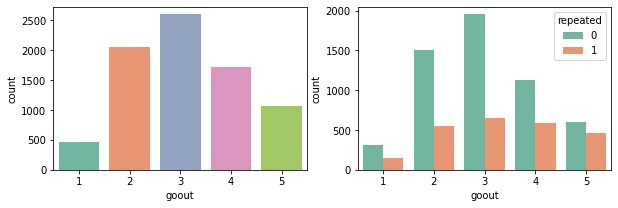

In [43]:
print(data.goout.describe())

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x='goout',data=data)
sns.countplot(ax = ax[1],x='goout',hue = 'repeated',data=data)
plt.show()

In [44]:
r0 = data.goout[data.repeated == 0]
r1 = data.goout[data.repeated == 1]

stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)

MVW:  9.942677972815905e-19


Srednja ocjena i medijan ocjene izlaska je 3. Postoji statistički značajna razlika distribucije ocjena izlazak obzirom na ponavljanje godine. 

Varijable **Dalc** i **Walc** su numeričke varijable koje ocjenjuju konzumaciju alkohola tijekom tjedna i vikenda redom. 

count    7900.000000
mean        1.481013
std         0.889670
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: Dalc, dtype: float64


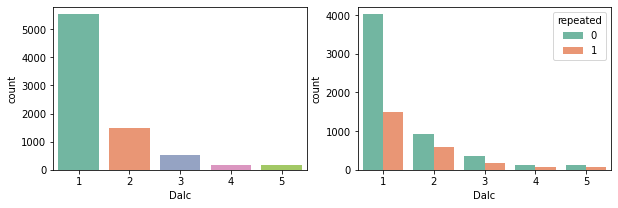

In [45]:
print(data.Dalc.describe())

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x='Dalc',data=data)
sns.countplot(ax = ax[1],x='Dalc',hue = 'repeated',data=data)
plt.show()

In [46]:
r0 = data.Dalc[data.repeated == 0]
r1 = data.Dalc[data.repeated == 1]

stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)

MVW:  1.6764137055955005e-17


count    7900.000000
mean        2.291139
std         1.286347
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Walc, dtype: float64


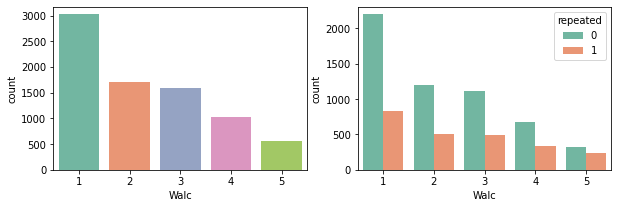

In [48]:
print(data.Walc.describe())

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x='Walc',data=data)
sns.countplot(ax = ax[1],x='Walc',hue = 'repeated',data=data)
plt.show()

In [49]:
r0 = data.Walc[data.repeated == 0]
r1 = data.Walc[data.repeated == 1]

stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)

MVW:  1.4899780693003666e-10


Vidimo kako većina učenika malo ili vrlo malo konzumira alkohol tokom tjedna i tokom vikenda. No statistički značajne razlike se pojavlju u distribuciji onih koji su ponavljali godinu i onih koji ne. 

Varijabla **health** numerička varijabla i pokazuje zdravstvenu ocjenu učenika. 

count    7900.00000
mean        3.55443
std         1.38863
min         1.00000
25%         3.00000
50%         4.00000
75%         5.00000
max         5.00000
Name: health, dtype: float64


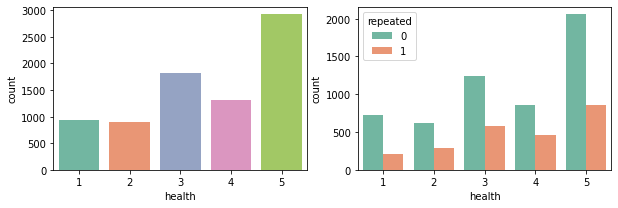

In [52]:
print(data.health .describe())

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(ax = ax[0],x='health',data=data)
sns.countplot(ax = ax[1],x='health',hue = 'repeated',data=data)
plt.show()

In [55]:
r0 = data.health[data.repeated == 0]
r1 = data.health[data.repeated == 1]

stat, p = mannwhitneyu(r0,r1)
print('MVW: ',p)

MVW:  0.034603087010724114


In [57]:
data.health.value_counts()/7900

5    0.369620
3    0.230380
4    0.167089
1    0.118987
2    0.113924
Name: health, dtype: float64

Veliki brioj učeika od $37\%$ ima izvrsnu ocjenu zdravlja, dok je medijalna ocjena zdravlja četvorka. $20\%$ učenika ima vrlo slabu ili slabu ocjenu zdravlja. Testom je pokazana statistički značajna razlika distribucije zdravlja u odnosu na ponavljanje godine. 

Varijabla **absences** je numeričkog tipa i pokazuje broj učenikovog izostanka iz škole. 

count    7900.000000
mean        5.708861
std         7.993465
min         0.000000
25%         0.000000
50%         4.000000
75%         8.000000
max        75.000000
Name: absences, dtype: float64


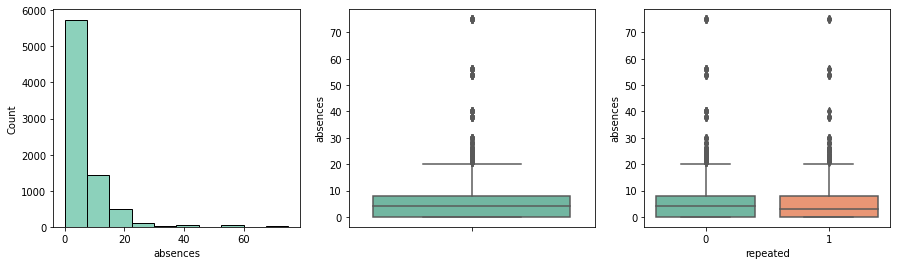

In [68]:
print(data.absences.describe())

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(ax = ax[0],x='absences',data=data,bins=10)
sns.boxplot(ax = ax[1],y='absences',data=data)
sns.boxplot(ax = ax[2],y='absences',x = 'repeated',data=data)
plt.show()

In [62]:
r0 = data.absences[data.repeated == 0]
r1 = data.absences[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)

print('t-test: ',p)

t-test:  0.7612144303599555


In [70]:
from scipy import stats
stats.ks_2samp(r0,r1)

Ks_2sampResult(statistic=0.08790042091406115, pvalue=1.0)

Iz opisne statistike vidimo kako $75\%$ je barem jednom izostalo iz škole. Postoje učenici koji izoslati čak 75 puta. No, rezultati testiranja prosječnog broja testiranja po grupi ponavljanja nije statistički značajan. 